In [1]:
%cd ..

/home/pg/projects/tennis-predictor


/home/pg/projects/tennis-predictor/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [16]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt

# Data exploration

## Tennis ATP Database

In [4]:
from tennis_predictor.config.data import TENNIS_ATP_DATABASE_PATH
cnx = sqlite3.connect(TENNIS_ATP_DATABASE_PATH)

### Tables

In [5]:
# Create a cursor object
cursor = cnx.cursor()

# Execute the SQL command to list all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results
tables = cursor.fetchall()

# Print the list of tables
for table in tables:
    print(table[0])

player
matches
ranking


In [6]:
df_player = pd.read_sql_query("SELECT * FROM player LIMIT 5", cnx)
df_player

,id,firstName,lastName,hand,birth,country
0,player_id,name_first,name_last,hand,dob,ioc
1,100001,Gardnar,Mulloy,R,19131122,USA
2,100002,Pancho,Segura,R,19210620,ECU
3,100003,Frank,Sedgman,R,19271002,AUS
4,100004,Giuseppe,Merlo,R,19271011,ITA


In [7]:
# Execute the SQL command to list all tables
cursor.execute("SELECT COUNT(*) FROM player;")

# Fetch all results
res = cursor.fetchall()
print(res[0][0])

65990


In [9]:
df_matches = pd.read_sql_query("SELECT * FROM matches LIMIT 5", cnx)
df_matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,,,...,,,,,,,,,,
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,,,...,,,,,,,,,,
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,,,...,,,,,,,,,,
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,,,...,,,,,,,,,,
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,,,...,,,,,,,,,,


In [10]:
df_matches.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [11]:
# Execute the SQL command to list all tables
cursor.execute("SELECT COUNT(*) FROM matches;")

# Fetch all results
res = cursor.fetchall()
print(res[0][0])

968207


In [12]:
df_ranking = pd.read_sql_query("SELECT * FROM ranking LIMIT 5", cnx)
df_ranking

,date,pos,player_id,pts
0,ranking_date,rank,player,points
1,20000110,1,101736,4135
2,20000110,2,102338,2915
3,20000110,3,101948,2419
4,20000110,4,103017,2184


In [13]:
# Execute the SQL command to list all tables
cursor.execute("SELECT COUNT(*) FROM ranking;")

# Fetch all results
res = cursor.fetchall()
print(res[0][0])

3292956


### Visualization

In [19]:
# TODO

## ELO

In [20]:
from tennis_predictor.config.data import ELO_INTERIM_PATH

In [22]:
df_elo = pd.read_csv(ELO_INTERIM_PATH.format(surface_type="All"))
df_elo.head()

,player_id,date,tourney_id,match_num,elo,n_matches
0,106387,18770701,NaN,NaN,1500.0,0
1,112878,18770701,NaN,NaN,1500.0,0
2,110590,18770701,NaN,NaN,1500.0,0
3,210241,18770701,NaN,NaN,1500.0,0
4,109850,18770701,NaN,NaN,1500.0,0


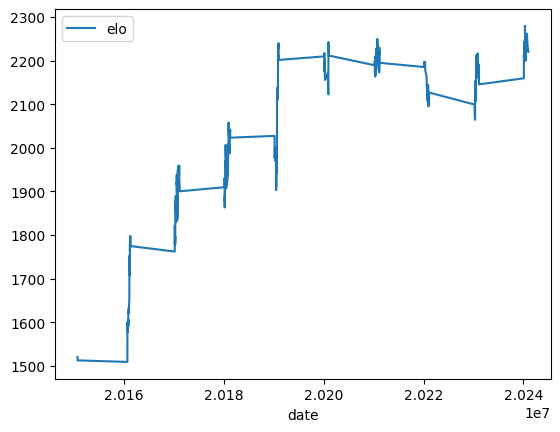

In [32]:
# Show ELO of Koepfer D. (player_id = 136440)
df_elo[df_elo["player_id"] == 136440].iloc[1:].set_index("date")[["elo"]].plot()
plt.show()

## Odds

In [33]:
from tennis_predictor.config.data import ODDS_INTERIM_PATH
df_odds = pd.read_csv(ODDS_INTERIM_PATH)
df_odds.head()

/tmp/ipykernel_4897/228035267.py:2: DtypeWarning: Columns (12,15,16,17,18,38,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_odds = pd.read_csv(ODDS_INTERIM_PATH)


,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,birth,country,shortName,id_loser,firstName_loser,lastName_loser,hand_loser,birth_loser,country_loser,shortName_loser
0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,Clement A.,...,19771217.0,FRA,Clement A.,102247.0,Andrea,Gaudenzi,R,19730730.0,ITA,Gaudenzi A.
1,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,Henman T.,...,19740906.0,GBR,Henman T.,102257.0,Greg,Rusedski,L,19730906.0,GBR,Rusedski G.
2,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,Hewitt L.,...,19810224.0,AUS,Hewitt L.,101885.0,Wayne,Arthurs,L,19710318.0,AUS,Arthurs W.
3,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,Ljubicic I.,...,19790319.0,CRO,Ljubicic I.,102227.0,Sargis,Sargsian,R,19730603.0,ARM,Sargsian S.
4,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,Malisse X.,...,19800719.0,BEL,Malisse X.,102162.0,Chris,Woodruff,R,19730102.0,USA,Woodruff C.


In [34]:
df_odds.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL',
       'B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts',
       'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL', 'WTA', 'Tier', 'id', 'firstName', 'lastName', 'hand',
       'birth', 'country', 'shortName', 'id_loser', 'firstName_loser',
       'lastName_loser', 'hand_loser', 'birth_loser', 'country_loser',
       'shortName_loser'],
      dtype='object')

In [39]:
print(df_odds['AvgW'].median(), df_odds['AvgL'].median())
print(df_odds['MaxW'].median(), df_odds['MaxL'].median())

1.53 2.49
1.6 2.7


# Advise

In [4]:
from tennis_predictor import advise
advise("De Jong J.", "Cobolli F.", 2.3, 1.51)

Player 207411 has ELO 2124 with 380 matches
Player 207925 has ELO 2329 with 324 matches
De Jong J. has a 23.5% estimated winrate.
We should bet 30.4% of our bankroll on Cobolli F..
